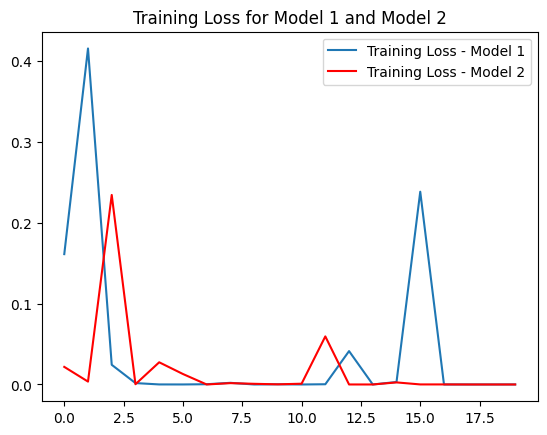

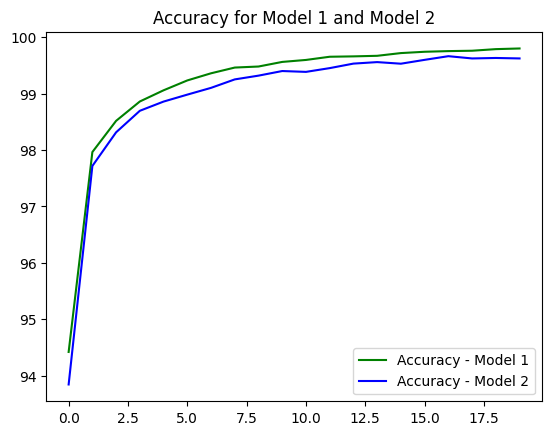

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

# Loading MNIST Dataset
transform_data = transforms.ToTensor()

train_dataset = datasets.MNIST(root='C:\\Users\\lokes\\OneDrive\\Desktop\\deep', train=True, download=True, transform=transform_data)
test_dataset = datasets.MNIST(root='C:\\Users\\lokes\\OneDrive\\Desktop\\deep', train=False, download=True, transform=transform_data)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

# Model 1 Definition
class ConvNet1(nn.Module):
    def __init__(self):
        super(ConvNet1, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, 3, 1)    # Convolutional layer 1
        self.conv2 = nn.Conv2d(8, 18, 3, 1)   # Convolutional layer 2
        self.fc1 = nn.Linear(18 * 5 * 5, 64)  # Fully connected layer 1
        self.fc2 = nn.Linear(64, 10)          # Fully connected layer 2 (output layer)

    def forward(self, x):
        x = F.relu(self.conv1(x))        # Applying first conv layer
        x = F.max_pool2d(x, 2)           # Max pooling
        x = F.relu(self.conv2(x))        # Applying second conv layer
        x = F.max_pool2d(x, 2)           # Max pooling
        x = x.view(-1, 18 * 5 * 5)       # Flatten before fully connected layers
        x = F.relu(self.fc1(x))          # First fully connected layer
        x = self.fc2(x)                  # Output layer
        return F.log_softmax(x, dim=1)

# Initialize Model 1
model1 = ConvNet1()

# Loss function and optimizer for Model 1
criterion1 = nn.CrossEntropyLoss()
optimizer1 = torch.optim.Adam(model1.parameters(), lr=0.001)

# Training Model 1
epochs = 20
train_losses1, test_losses1 = [], []
train_correct1, test_correct1 = [], []

for epoch in range(epochs):
    epoch_train_correct = 0
    epoch_test_correct = 0

    for batch, (images, labels) in enumerate(train_loader):
        # Apply model
        output = model1(images)
        loss = criterion1(output, labels)

        # Backpropagation and optimization
        optimizer1.zero_grad()
        loss.backward()
        optimizer1.step()

        predicted = torch.max(output.data, 1)[1]
        correct_preds = (predicted == labels).sum().item()
        epoch_train_correct += correct_preds

    train_losses1.append(loss)
    train_correct1.append(epoch_train_correct)

    # Testing Model 1
    with torch.no_grad():
        for images, labels in test_loader:
            output = model1(images)
            predicted = torch.max(output.data, 1)[1]
            epoch_test_correct += (predicted == labels).sum().item()

    loss = criterion1(output, labels)
    test_losses1.append(loss)
    test_correct1.append(epoch_test_correct)


# Model 2 Definition
class ConvNet2(nn.Module):
    def __init__(self):
        super(ConvNet2, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 4, 1)    # Convolutional layer 1
        self.conv2 = nn.Conv2d(6, 16, 4, 1)   # Convolutional layer 2
        self.fc1 = nn.Linear(16 * 4 * 4, 64)  # Fully connected layer 1
        self.fc2 = nn.Linear(64, 32)          # Fully connected layer 2
        self.fc3 = nn.Linear(32, 10)          # Fully connected layer 3 (output layer)

    def forward(self, x):
        x = F.relu(self.conv1(x))        # Applying first conv layer
        x = F.max_pool2d(x, 2)           # Max pooling
        x = F.relu(self.conv2(x))        # Applying second conv layer
        x = F.max_pool2d(x, 2)           # Max pooling
        x = x.view(-1, 16 * 4 * 4)       # Flatten before fully connected layers
        x = F.relu(self.fc1(x))          # First fully connected layer
        x = F.relu(self.fc2(x))          # Second fully connected layer
        x = self.fc3(x)                  # Output layer
        return F.log_softmax(x, dim=1)

# Initialize Model 2
model2 = ConvNet2()

# Loss function and optimizer for Model 2
criterion2 = nn.CrossEntropyLoss()
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.001)

# Training Model 2
train_losses2, test_losses2 = [], []
train_correct2, test_correct2 = [], []

for epoch in range(epochs):
    epoch_train_correct = 0
    epoch_test_correct = 0

    for batch, (images, labels) in enumerate(train_loader):
        # Apply model
        output = model2(images)
        loss = criterion2(output, labels)

        # Backpropagation and optimization
        optimizer2.zero_grad()
        loss.backward()
        optimizer2.step()

        predicted = torch.max(output.data, 1)[1]
        correct_preds = (predicted == labels).sum().item()
        epoch_train_correct += correct_preds

    train_losses2.append(loss)
    train_correct2.append(epoch_train_correct)

    # Testing Model 2
    with torch.no_grad():
        for images, labels in test_loader:
            output = model2(images)
            predicted = torch.max(output.data, 1)[1]
            epoch_test_correct += (predicted == labels).sum().item()

    loss = criterion2(output, labels)
    test_losses2.append(loss)
    test_correct2.append(epoch_test_correct)

# Convert training losses to tensor
train_losses1 = torch.tensor(train_losses1)
train_losses2 = torch.tensor(train_losses2)

# Plotting Training Loss for Model 1 and Model 2
plt.plot(train_losses1.detach().numpy(), label='Training Loss - Model 1')
plt.plot(train_losses2.detach().numpy(), 'r', label='Training Loss - Model 2')
plt.title('Training Loss for Model 1 and Model 2')
plt.legend()
plt.show()

# Plotting Accuracy for Model 1 and Model 2
plt.plot([t / 600 for t in train_correct1], 'g', label='Accuracy - Model 1')
plt.plot([t / 600 for t in train_correct2], 'b', label='Accuracy - Model 2')
plt.title('Accuracy for Model 1 and Model 2')
plt.legend()
plt.show()
